In [55]:
#---------------------------------Data Analysis--------------------------------
!pip install pandas matplotlib seaborn

In [56]:
# STEP 1 — Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# STEP 2 — Upload Dataset
import pandas as pd
file_path = "/content/drive/MyDrive/neo_v2.csv.csv"
data = pd.read_csv(file_path)
print(data.head())

   Unnamed: 0       id  neo_reference_id                        name  \
0           0  2001981           2001981        1981 Midas (1973 EA)   
1           1  2002059           2002059  2059 Baboquivari (1963 UA)   
2           2  2002061           2002061         2061 Anza (1960 UA)   
3           3  2002062           2002062         2062 Aten (1976 AA)   
4           4  2002063           2002063      2063 Bacchus (1977 HB)   

  name_limited designation  absolute_magnitude_h  \
0        Midas        1981                 15.22   
1  Baboquivari        2059                 15.97   
2         Anza        2061                 16.36   
3         Aten        2062                 17.10   
4      Bacchus        2063                 17.28   

   is_potentially_hazardous_asteroid  is_sentry_object  \
0                               True             False   
1                              False             False   
2                              False             False   
3                     

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         24000 non-null  int64  
 1   id                                 24000 non-null  int64  
 2   neo_reference_id                   24000 non-null  int64  
 3   name                               24000 non-null  object 
 4   name_limited                       144 non-null    object 
 5   designation                        24000 non-null  object 
 6   absolute_magnitude_h               23992 non-null  float64
 7   is_potentially_hazardous_asteroid  24000 non-null  bool   
 8   is_sentry_object                   24000 non-null  bool   
 9   kilometers_estimated_diameter_min  23992 non-null  float64
 10  kilometers_estimated_diameter_max  23992 non-null  float64
 11  orbit_id                           24000 non-null  obj

In [60]:
data.describe()

,Unnamed: 0,id,neo_reference_id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,24000.000000,2.400000e+04,2.400000e+04,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,11999.500000,7.275111e+06,7.275111e+06,22.942274,0.167777,0.375160,0.915225,2.653104
std,6928.347566,1.333987e+07,1.333987e+07,2.952871,0.293000,0.655169,0.232201,4.468233
min,0.000000,2.001981e+06,2.001981e+06,12.580000,0.000609,0.001362,0.070431,0.653754
25%,5999.750000,3.409962e+06,3.409962e+06,20.650000,0.024241,0.054205,0.785150,1.706281
50%,11999.500000,3.703790e+06,3.703790e+06,23.200000,0.060891,0.136157,0.965325,2.480109
75%,17999.250000,3.803897e+06,3.803897e+06,25.200000,0.197040,0.440595,1.068984,3.397965
max,23999.000000,5.408749e+07,5.408749e+07,33.200000,8.101305,18.115068,1.299988,631.895456


In [61]:
# STEP 3 — Check Columns
data.columns

Index(['Unnamed: 0', 'id', 'neo_reference_id', 'name', 'name_limited',
       'designation', 'absolute_magnitude_h',
       'is_potentially_hazardous_asteroid', 'is_sentry_object',
       'kilometers_estimated_diameter_min',
       'kilometers_estimated_diameter_max', 'orbit_id', 'orbit_class_type',
       'perihelion_distance', 'aphelion_distance', 'first_observation_date',
       'last_observation_date', 'orbit_class_description'],
      dtype='object')

In [62]:
# STEP 4 — Data Cleaning
data = data.drop(columns=['Unnamed: 0'])

In [63]:
# STEP 5 — Hazardous Asteroid Detection
hazard_counts = data['is_potentially_hazardous_asteroid'].value_counts()

hazard_counts

,count
is_potentially_hazardous_asteroid,
False,21906
True,2094


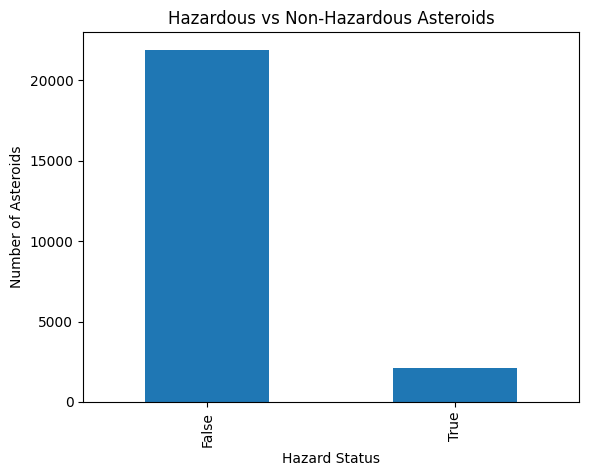

In [64]:
# STEP 6 — Visualization 1
hazard_counts.plot(kind='bar')

plt.title("Hazardous vs Non-Hazardous Asteroids")
plt.xlabel("Hazard Status")
plt.ylabel("Number of Asteroids")
plt.show()

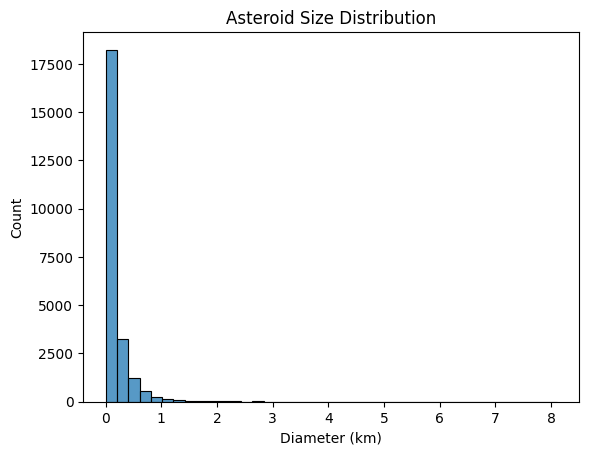

In [65]:
#STEP 7 — Asteroid Size Analysis
sns.histplot(data['kilometers_estimated_diameter_min'], bins=40)

plt.title("Asteroid Size Distribution")
plt.xlabel("Diameter (km)")
plt.show()

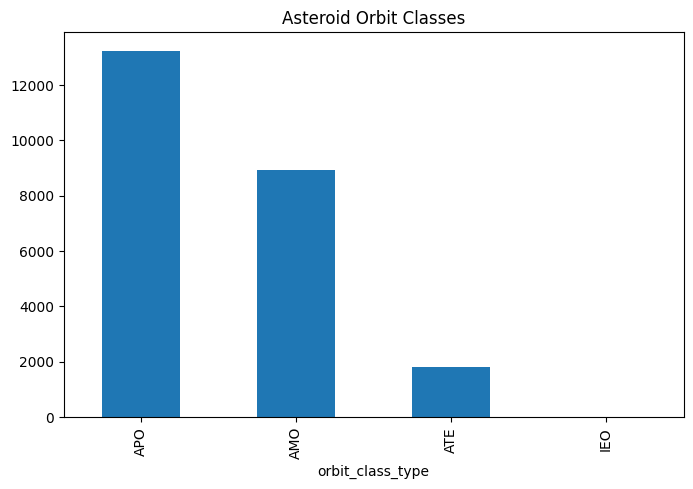

In [66]:
# STEP 8 — Orbit Type Analysis
plt.figure(figsize=(8,5))

data['orbit_class_type'].value_counts().plot(kind='bar')

plt.title("Asteroid Orbit Classes")
plt.show()

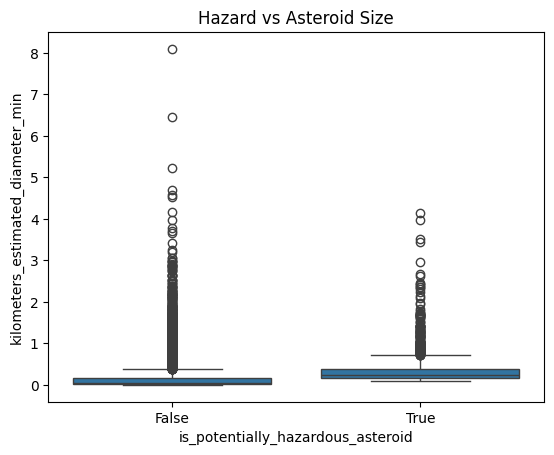

In [67]:
# STEP 9 — Hazard vs Size Relationship
sns.boxplot(
    x='is_potentially_hazardous_asteroid',
    y='kilometers_estimated_diameter_min',
    data=data
)

plt.title("Hazard vs Asteroid Size")
plt.show()

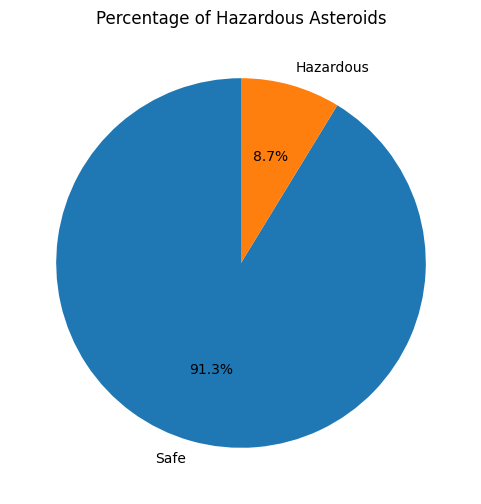

In [68]:
#STEP 10 : Visualization - Hazard Percentage Pie Chart
hazard_counts = data['is_potentially_hazardous_asteroid'].value_counts()

plt.figure(figsize=(6,6))

plt.pie(
    hazard_counts,
    labels=["Safe","Hazardous"],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Percentage of Hazardous Asteroids")
plt.show()

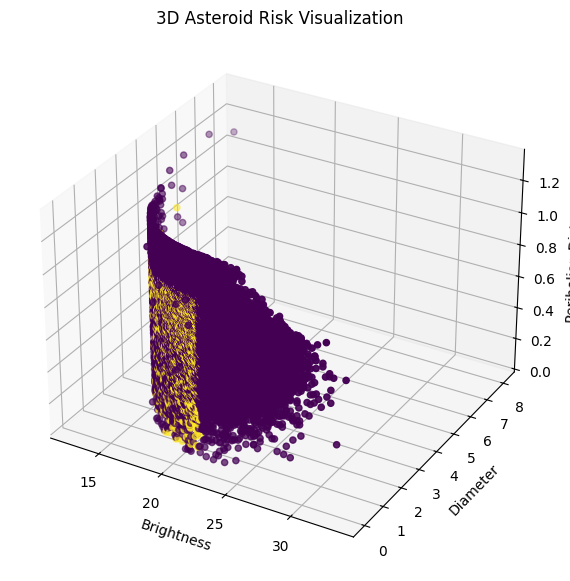

In [69]:
# Visualization — 3D Asteroid Risk Visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    data['absolute_magnitude_h'],
    data['kilometers_estimated_diameter_min'],
    data['perihelion_distance'],
    c=data['is_potentially_hazardous_asteroid'].astype(int)
)

ax.set_xlabel("Brightness")
ax.set_ylabel("Diameter")
ax.set_zlabel("Perihelion Distance")

plt.title("3D Asteroid Risk Visualization")
plt.show()

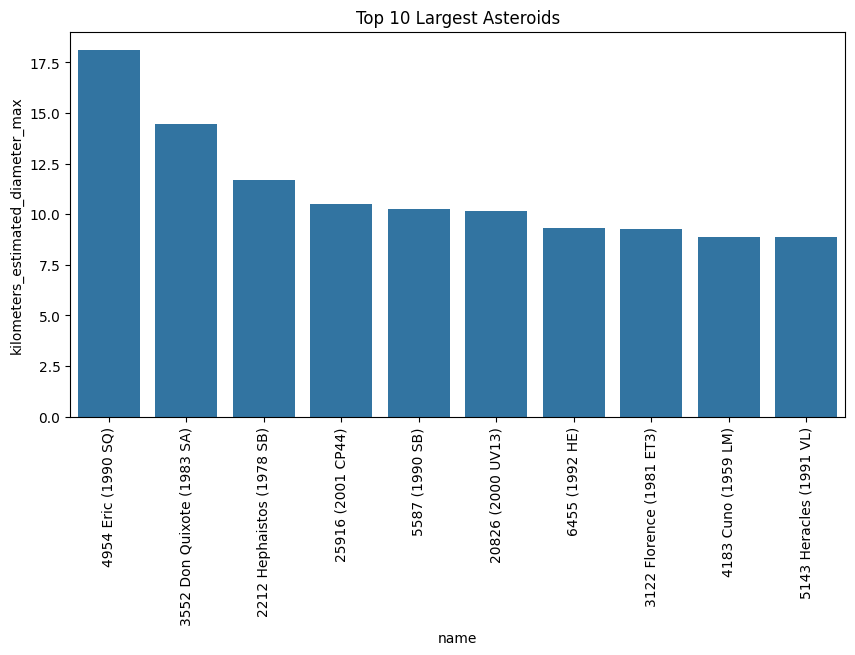

In [70]:
# Visualization — Top Largest Asteroids Chart
top10 = data.nlargest(10,'kilometers_estimated_diameter_max')

plt.figure(figsize=(10,5))

sns.barplot(
    x='name',
    y='kilometers_estimated_diameter_max',
    data=top10
)

plt.xticks(rotation=90)
plt.title("Top 10 Largest Asteroids")
plt.show()

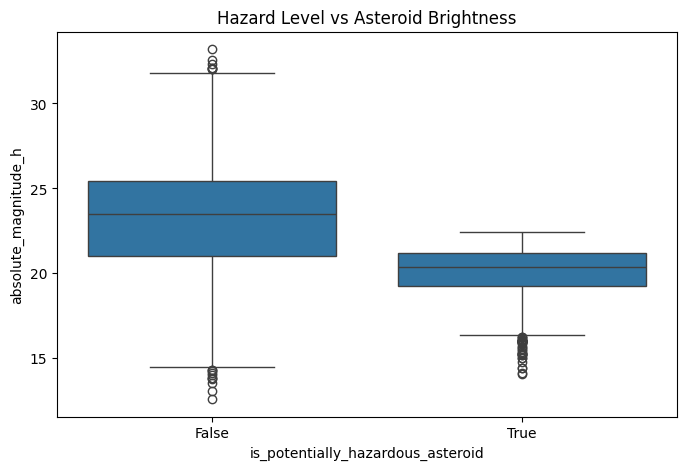

In [71]:
# Visualization — Box Plot
plt.figure(figsize=(8,5))

sns.boxplot(
    x='is_potentially_hazardous_asteroid',
    y='absolute_magnitude_h',
    data=data
)

plt.title("Hazard Level vs Asteroid Brightness")
plt.show()

In [72]:
# STEP 11 — Create Risk Label (Detection Logic)
def risk_label(x):
    if x == True:
        return "High Risk"
    else:
        return "Low Risk"

data["Risk_Level"] = data['is_potentially_hazardous_asteroid'].apply(risk_label)

data[['name','Risk_Level']].head()

,name,Risk_Level
0,1981 Midas (1973 EA),High Risk
1,2059 Baboquivari (1963 UA),Low Risk
2,2061 Anza (1960 UA),Low Risk
3,2062 Aten (1976 AA),Low Risk
4,2063 Bacchus (1977 HB),Low Risk


In [73]:
#------------------------------------FOR ACCURACY (ML)-----------------------

#STEP 1 — Install ML Library (Colab)

!pip install scikit-learn

In [74]:
#STEP 2 — Import ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
#STEP 3 — Select Features
features = data[[
    'absolute_magnitude_h',
    'kilometers_estimated_diameter_min',
    'kilometers_estimated_diameter_max',
    'perihelion_distance',
    'aphelion_distance'
]]

target = data['is_potentially_hazardous_asteroid']

In [76]:
#STEP 4 — Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=42
)

In [77]:
#STEP 5 — Train Model
model =RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
#STEP 6 — Make Predictions
predictions = model.predict(X_test)

In [79]:
#STEP 7 — Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.911875


In [80]:
#STEP 8 — Confusion Matrix (Teacher Impressing)
confusion_matrix(y_test, predictions)

array([[4229,  154],
       [ 269,  148]])

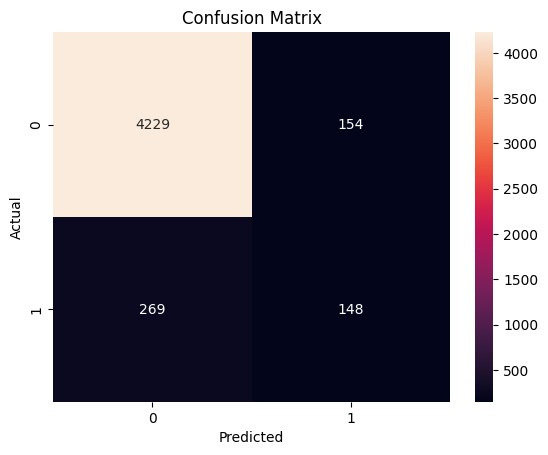

In [81]:
#Better Visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, predictions),
            annot=True,
            fmt='d')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
# STEP 9 — Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95      4383
        True       0.49      0.35      0.41       417

    accuracy                           0.91      4800
   macro avg       0.72      0.66      0.68      4800
weighted avg       0.90      0.91      0.91      4800

